# Import packages and Read the dataset

**Import required libraries and modules**

In [ ]:
import random 

import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from skimage.feature import hog

import os
from imutils import paths
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 


**Read the Dataset with imutils package**

In [ ]:
from imutils import paths
imagePaths = list(paths.list_images('ckplus/CK+48'))

In [ ]:
imagePaths

In [ ]:
plt.imshow(np.array(cv2.imread(imagePaths[0])), cmap='gray')
label = imagePaths[0].split(os.path.sep)[-2]
plt.title(label)

In [ ]:
cv2.imshow(imagePaths[9],0)

TypeError: Image data of dtype object cannot be converted to float

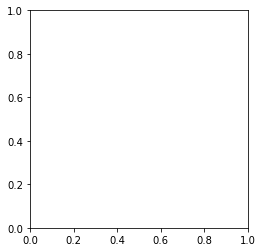

In [ ]:
plt.imshow(np.array(cv2.imread(imagePaths[0])), cmap='gray')
label = imagePaths[0].split(os.path.sep)[-2]
plt.title(label)

In [35]:
cv2.imshow(imagePaths[9],0)

**Show samples of CK+ dataset**

In [ ]:

fig = plt.figure(figsize=(20,20))

for i in range(10):

    fig.add_subplot(1, 10, i + 1)
    plt.imshow(np.array(cv2.imread(imagePaths[i])), cmap='gray')
    label = imagePaths[i].split(os.path.sep)[-2]
    plt.title(label)



# Preprocessing and Feature extraction

**Read and convert images into gray-scale**

In [9]:
def colortogray(im):
    image = cv2.imread(im)
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return imgray

**Resize images with a fixed size(INTER LINEAR interpolation)**

In [10]:
def resizeImage(image, size):
    # cv2.imshow('Resized', cv2.resize(image, (size,size), interpolation=cv2.INTER_CUBIC))
    return cv2.resize(image, (size,size))


**Features extraction with HOG algorithm**

In [11]:
def feat_lab(imagePaths):

    features = []
    labels = []

    for imagePath in imagePaths:
        im = colortogray(imagePath)
        im = resizeImage(im,64)
        fd1 =  hog(im, orientations=7, pixels_per_cell=(8, 8),cells_per_block=(4, 4),block_norm= 'L2-Hys' ,transform_sqrt = False)

        label = imagePath.split(os.path.sep)[-2]
        labels.append(label)
        features.append(fd1)

    features = np.array(features)
    labels = np.array(labels)
    return features,labels
  


**Compute the features and obtain the lables using the previous functions**

In [12]:
features,labels = feat_lab(imagePaths)


print("[INFO] The number of features ..." + str(features.shape[1]))

print("[INFO] The number of samples ..." + str(labels.shape[0]))




# Classification



***The classifier***

In [ ]:
svm_clf = SVC(kernel='rbf', gamma='scale', C= 10)



1.   **Hold-out accuracy**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = classification_report(y_train, pred)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = classification_report(y_test, pred)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

################################################################################
################################################################################

R =random.randint(1,88)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.3,random_state=R)

print("[INFO] The number of images used in training ..." + str(X_train.shape[0]))
print("[INFO] The number of images used in testing ..." + str(X_test.shape[0]))


svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

*2*.   **Cross-validation accuracy**

**3-FOLDS**

In [ ]:

cv = KFold(n_splits=3, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svm_clf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# Report performance

print('SVM MEAN  Accuracy: ',str(np.mean(scores)*100)[:5] + '%')
print('Standard deviation: ',str(np.std(scores)*100)[:5] + '%')

**5-FOLDS**

In [ ]:

cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svm_clf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# Report performance

print('SVM MEAN  Accuracy: ',str(np.mean(scores)*100)[:5] + '%')
print('Standard deviation: ',str(np.std(scores)*100)[:5] + '%')

**10-FOLDS**

In [ ]:

cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svm_clf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# Report performance

print('SVM MEAN  Accuracy: ',str(np.mean(scores)*100)[:5] + '%')
print('Standard deviation: ',str(np.std(scores)*100)[:5] + '%')